## Imports

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import json


## Comparison enviorment

### Generate random results

In [ ]:
def load_json(file_name):
  with open(f'{file_name}.json', 'r') as f:
    data = json.load(f)
    data['episode'] = len(data['runtime'])
    # change to minutes
    data['runtime'] = [round(sec/60, 2) for sec in data['runtime']]
    return data


In [ ]:
ramdon_agents = load_json('stats_random') #{'runtime': [], 'reward': [], 'episode': []}
agent1 = load_json('agent1')
agent2 = {'runtime': [], 'reward': [], 'episode': []}

# ramdon_agents['runtime'] = [random.randint(50,100) for i in range(0,3)]
# agent1['runtime'] = [random.randint(0,20) for i in range(0,3)]
agent2['runtime'] = [random.randint(0,20) for i in range(0,3)]


# ramdon_agents['reward'] = [random.randint(1,100) for i in range(0,3)]
# agent1['reward'] = [random.randint(1,100) for i in range(0,3)]
agent2['reward'] = [random.randint(1,100) for i in range(0,3)]


# ramdon_agents['episode'] = len(ramdon_agents['runtime'])
# agent1['episode'] = len(agent1['runtime'])
agent2['episode'] = len(agent2['runtime'])

In [ ]:
ramdon_agents

{'runtime': [17.27, 12.31, 5.82], 'reward': [0.0, 0.0, 0.0], 'episode': 3}

In [ ]:
agent1

{'runtime': [0, 2, 18], 'reward': [97, 5, 68], 'episode': 3}

In [ ]:
agent2

{'runtime': [13, 4, 20], 'reward': [81, 77, 81], 'episode': 3}

### Compare

In [ ]:
colors = ['#00AA00', '#402A00', '#0000AA']

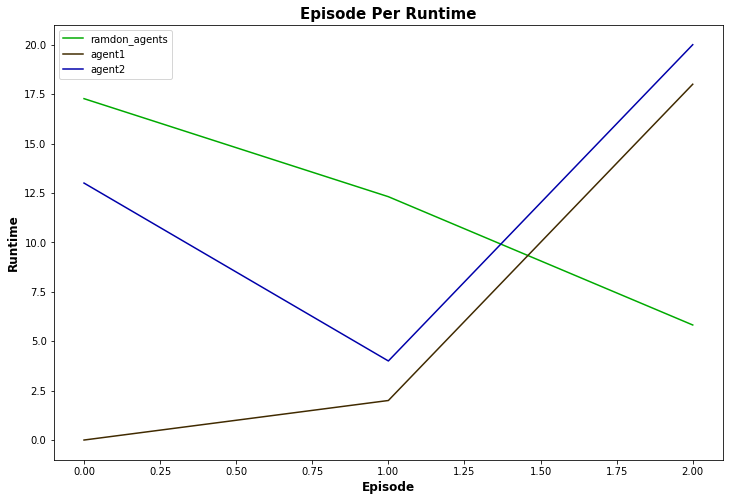

In [ ]:
fig = plt.subplots(figsize =(12, 8))

for (c, agent, name) in [(colors[0], ramdon_agents, 'ramdon_agents'), (colors[1], agent1, 'agent1'), (colors[2], agent2, 'agent2')]:
  axis_x = [i for i in range(agent['episode'])]
  axis_y = agent['runtime']
  plt.plot(axis_x, axis_y, c, label=name)
  plt.title('Episode Per Runtime', fontweight ='bold', fontsize = 15)
  plt.xlabel('Episode', fontweight ='bold', fontsize = 12)
  plt.ylabel('Runtime', fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()

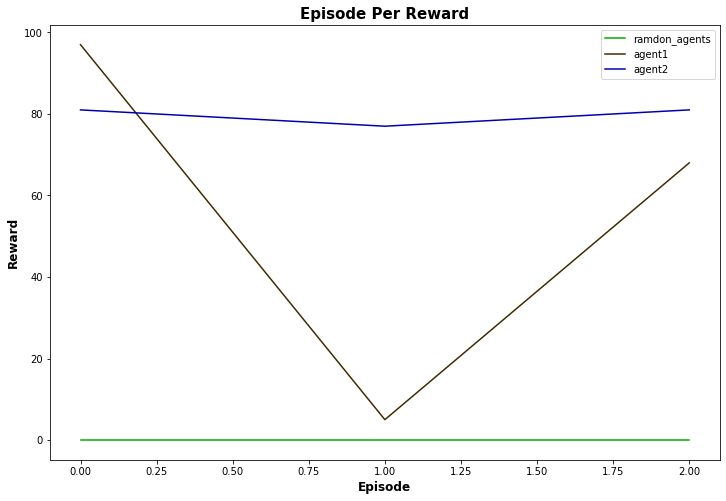

In [ ]:
fig = plt.subplots(figsize =(12, 8))

for (c, agent, name) in [(colors[0], ramdon_agents, 'ramdon_agents'), (colors[1], agent1, 'agent1'), (colors[2], agent2, 'agent2')]:
  axis_x = [i for i in range(agent['episode'])]
  axis_y = agent['reward']
  plt.plot(axis_x, axis_y, c, label=name)
  plt.title('Episode Per Reward', fontweight ='bold', fontsize = 15)
  plt.xlabel('Episode', fontweight ='bold', fontsize = 12)
  plt.ylabel('Reward', fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()

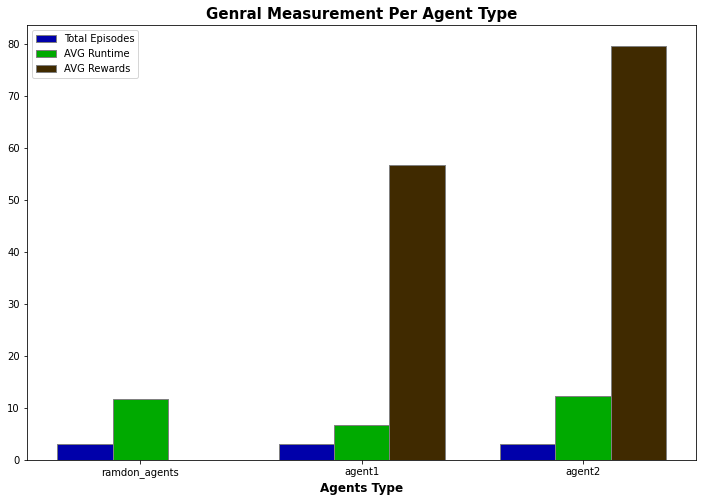

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
total_epochs = [(agent['episode']) for agent in [ramdon_agents, agent1, agent2]]
total_runtime = [np.mean((agent['runtime'])) for agent in [ramdon_agents, agent1, agent2]]
sum_rewards = [np.mean(agent['reward']) for agent in [ramdon_agents, agent1, agent2]]

# Set position of bar on X axis
br1 = np.arange(len(total_epochs))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, total_epochs, color=colors[2], width = barWidth,
		edgecolor ='grey', label ='Total Episodes')
plt.bar(br2, total_runtime, color=colors[0], width = barWidth,
		edgecolor ='grey', label ='AVG Runtime')
plt.bar(br3, sum_rewards, color =colors[1], width = barWidth,
		edgecolor ='grey', label ='AVG Rewards')

# Adding Xticks
plt.title('Genral Measurement Per Agent Type', fontweight ='bold', fontsize = 15)

plt.xlabel('Agents Type', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(total_epochs))],
		['ramdon_agents', 'agent1', 'agent2'])

plt.legend()
plt.show()


In [ ]:
ramdon_agents_df = pd.DataFrame.from_dict(ramdon_agents)
agent1_df = pd.DataFrame.from_dict(agent1)
agent2_df = pd.DataFrame.from_dict(agent2)

In [ ]:
# def background_yellow(val):
#     max_rt = max(ramdon_agents_df.describe()['runtime'])
#     max_rw = max(ramdon_agents_df.describe()['reward'])
#     max_ep = max(ramdon_agents_df.describe()['episode'])
#     color = 'yellow' if val == max_rt else ''
#     return 'background-color: %s' % color
# ramdon_agents_df.describe().style.applymap(background_yellow)#applymap(background_yellow)

In [ ]:
# des_random = ramdon_agents_df.describe()
# for row in list(des_random.index):
#   des_random.loc[row]   
# # print(des_random.index)
# des_random.loc['max']   

In [ ]:
ramdon_agents_df.describe()

,runtime,reward,episode
count,3.000000,3.0,3.0
mean,11.800000,0.0,3.0
std,5.742012,0.0,0.0
min,5.820000,0.0,3.0
25%,9.065000,0.0,3.0
50%,12.310000,0.0,3.0
75%,14.790000,0.0,3.0
max,17.270000,0.0,3.0


In [ ]:
agent1_df.describe()

,runtime,reward,episode
count,10.000000,10.000000,10.0
mean,73.500000,49.500000,10.0
std,12.668859,31.623655,0.0
min,51.000000,2.000000,10.0
25%,64.250000,30.250000,10.0
50%,76.500000,52.000000,10.0
75%,81.000000,73.500000,10.0
max,89.000000,96.000000,10.0


In [ ]:
agent2_df.describe()

,runtime,reward,episode
count,10.000000,10.000000,10.0
mean,74.700000,63.000000,10.0
std,14.674619,29.586033,0.0
min,52.000000,2.000000,10.0
25%,67.750000,49.750000,10.0
50%,76.500000,72.500000,10.0
75%,83.500000,85.250000,10.0
max,96.000000,96.000000,10.0
